### SVR

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
import seaborn as sns

In [3]:
train = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/train_38_predictors.csv', header = 0)
test = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/test_38_predictors.csv', header = 0)

In [4]:
#lets be sure we all are using hte same way to split data
#First attempt, rather neede to be changed to CV and normalize teh data
#cv = KFold(n_splits=10, random_state=1, shuffle=True)
dfX = train.loc[:, train.columns != 'site_eui']
dfY = train['site_eui']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.33, random_state=1)

In [5]:
#here normalize data
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#features
feat = pickle.load(open("drive/Shareddrives/DS4W-Team/Data/train_38_predictors_sfs_list.pickle", "rb"))

In [7]:
dfY.describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

In [ ]:
top_feat = ['']

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(C=64, epsilon=4, random_state=1)

In [18]:
eps = 4
model = LinearSVR(epsilon=eps, C=32, fit_intercept=True, random_state = 1)
model.fit(X_train_scaled, y_train)
mae_trn = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, model.predict(X_test_scaled))
rmse_trn = mean_squared_error(y_train, model.predict(X_train_scaled), squared = False)
rmse_test = mean_squared_error(y_test, model.predict(X_test_scaled), squared = False)

print(f'mae_trn is: {mae_trn}')
print(f'mae_test is: {mae_test}')
print(f'rmse_trn is: {rmse_trn}')
print(f'rmse_test is: {rmse_test}')

mae_trn is: 23.537013564966557
mae_test is: 23.756248831119578
rmse_trn is: 48.52178483140084
rmse_test is: 50.3589959487389


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:
coeflist = list(zip(feat,model.coef_.tolist()))
coefficients = pd.DataFrame(coeflist, columns=['feat','coeff']) 

In [31]:
coefficients.columns

Index(['feat', 'coeff'], dtype='object')

In [32]:
coefficients.sort_values(by = ['coeff'], ascending=False)

,feat,coeff
14,building_class_Commercial,14.541446
21,facility_type_facility_group_14,12.553957
16,facility_type_facility_group_1,12.201813
24,facility_type_facility_group_18,9.583367
3,heating_degree_days,6.724063
32,facility_type_facility_group_4,3.513712
5,avg_temp,3.502199
13,State_Factor_State_6,3.163651
22,facility_type_facility_group_16,2.823196
15,facility_type_facility_group_0,2.101068


In [26]:
model.intercept_

array([77.51830227])

In [62]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[:15]


    # MEDIUM_SIZE = 16
    plt.rc('axes', titlesize=12)     # fontsize of the axes title
    plt.rc('axes', labelsize=12)    # fontsize of the x and y labels 
    plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

    

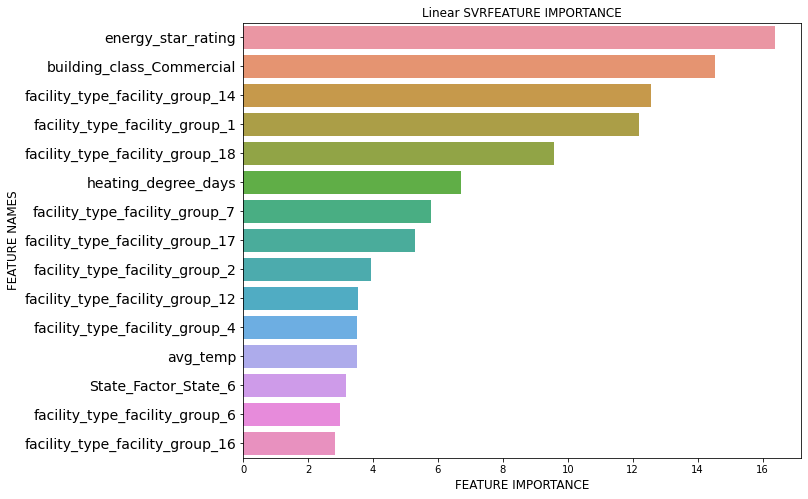

In [63]:
importance = np.abs(coefficients['coeff'])
names = coefficients['feat']
plot_feature_importance(importance, names, 'Linear SVR')

In [24]:
model_grid = LinearSVR()

#svc = svm.SVR()

grid = GridSearchCV(

#estimator=SVR(kernel='linear'),

estimator= model_grid,

param_grid={

'C': [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],

'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4],

         },
      scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid.fit(X_train_scaled, y_train)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)

best parameters are:  {'C': 64, 'epsilon': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 64, epsilon = 4

In [631]:
model_grid = LinearSVR()

#svc = svm.SVR()

grid = GridSearchCV(

#estimator=SVR(kernel='linear'),

estimator= model_grid,

param_grid={

'C': [0.05, 0.1, 1, 2],

'epsilon': [10, 15, 20],

         },
      scoring='neg_mean_squared_error', verbose = 3, n_jobs=-1)

grid.fit(X_train, y_train)


#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: ignored

## rbf kernel

In [15]:
eps_rbf = 2
svr = SVR(epsilon=eps_rbf, C=4).fit(X_train_scaled, y_train)

In [16]:
yhat_train = svr.predict(X_train_scaled)
yhat_test = svr.predict(X_test_scaled)

In [17]:
mae_trn = mean_absolute_error(y_train, yhat_train)
mae_test = mean_absolute_error(y_test, yhat_test)
rmse_trn = mean_squared_error(y_train, yhat_train, squared = False)
rmse_test = mean_squared_error(y_test, yhat_test, squared = False)
print(f'mae_trn is: {mae_trn}')
print(f'mae_test is: {mae_test}')
print(f'rmse_trn is: {rmse_trn}')
print(f'rmse_test is: {rmse_test}')

mae_trn is: 27.318830862355803
mae_test is: 27.59215123713146
rmse_trn is: 54.619284426415966
rmse_test is: 56.625894262254675


In [ ]:



grid = GridSearchCV(

estimator=SVR(kernel='rbf'),

param_grid={

'C': [1, 2, 4, 8],

'epsilon': [0.5, 1, 2, 4],

         },
      scoring='neg_mean_squared_error', verbose = 3, n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [1]:
print("best parameters are: ", grid.best_params_)

NameError: ignored